In [1]:
from utils_synthetic import *
%load_ext autoreload
%autoreload 2

What happens when you apply the replication measure to two independent data sets that contain no clusters, but are drawn from the same distribution?

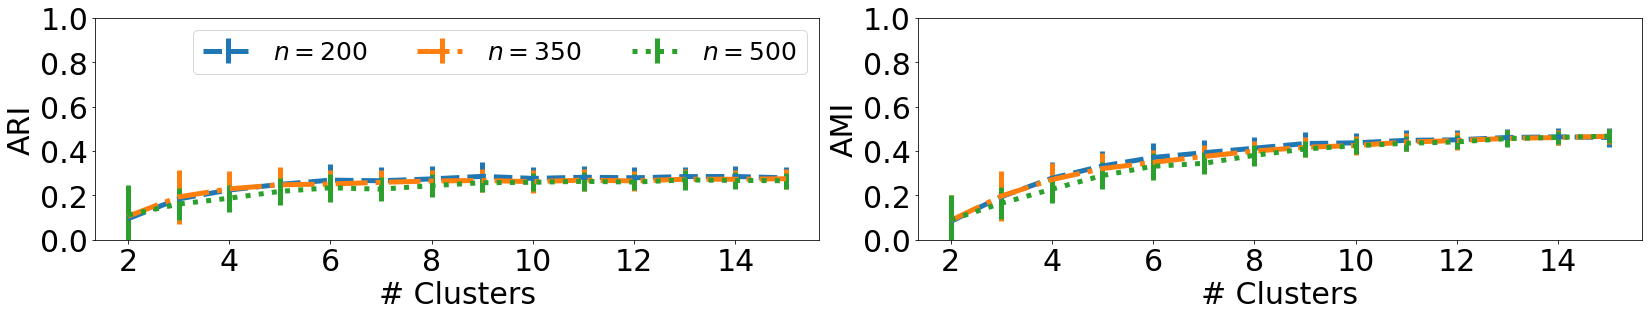

In [2]:
### SCALING IN N - how do scores change for increasingly large datasets?

'''
    SETUP PARAMETERS FOR SYNTHETIC DATA GENERATION
'''

seed = 42 # seed for pseudo RNG
d = 5 # dimension of dataset
np.random.seed(seed) # seed
num_boots = 100 # number of bootstrap runs
max_cluster_number = 15 # maximum number of clusters in algorithm
N_ls = np.linspace(50, 500, 4, dtype = int) # sample sizes

'''
    DRAW DATA
'''

# ari_ls, ami_ls = np.zeros([len(N_ls), max_cluster_number-1, num_boots]), np.zeros([len(N_ls), max_cluster_number-1, num_boots])
# for _, N in enumerate(N_ls):
#     X, Y = np.random.multivariate_normal(mean = np.zeros(d), cov = np.eye(d), size = N), np.random.multivariate_normal(mean = np.zeros(d), cov = np.eye(d), size = N)
#     ari, ami, true_labels, predicted_labels = run_exercise_1_kmeans(X, Y, num_boots, max_cluster_number)
#     ari_ls[_] = ari
#     ami_ls[_] = ami

'''
    SAVE RESULTS
'''

# np.save('Additional_Experiments/no_clusters_ari', ari_ls)
# np.save('Additional_Experiments/no_clusters_ami', ami_ls)

'''
    LOAD RESULTS
'''

ari_ls = np.load('Additional_Experiments/no_clusters_ari.npy')
ami_ls = np.load('Additional_Experiments/no_clusters_ami.npy')

'''
    PLOTTING
'''

linestyles = ['-', '--', '-.', ':']

'''
    ARI , AMI based replicability metric
'''

plt.figure(figsize = (23,4.5))
plt.subplot(121)
for _, N in enumerate(N_ls):
    if _ == 0:
        pass
    else:
        plt.errorbar(x=np.arange(2,len(ari_ls[_])+2), y=ari_ls[_].mean(axis = 1),yerr=ari_ls[_].std(axis = 1), linestyle = linestyles[_], lw = 5, label = r'$n=$'+str(N))
plt.legend(ncol = 3, fontsize = 25)
plt.ylim([0,1])
plt.xlabel('# Clusters', fontsize= 30)
plt.ylabel('ARI', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)


plt.subplot(122)
for _, N in enumerate(N_ls):
    if _ == 0: 
        pass
    else:
        plt.errorbar(x=np.arange(2,len(ami_ls[_])+2), y=ami_ls[_].mean(axis = 1),yerr=ami_ls[_].std(axis = 1), linestyle = linestyles[_], lw = 5, label = r'$N=$'+str(N))
plt.xlabel('# Clusters', fontsize= 30)
plt.ylabel('AMI', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylim([0,1])
plt.tight_layout()
plt.savefig('Plots/no_clustering.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

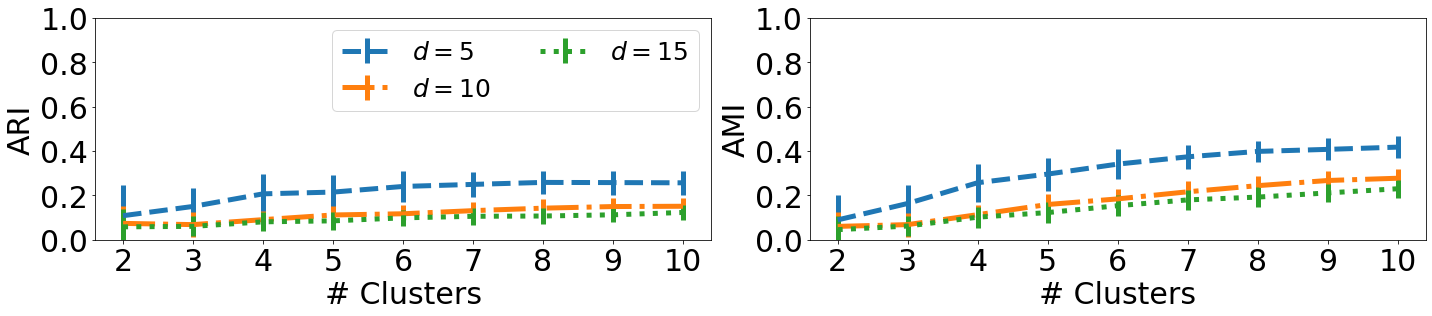

In [3]:
### SCALING IN d - how do scores change for increasingly large dimension?

'''
    SETUP PARAMETERS FOR SYNTHETIC DATA GENERATION
'''

seed = 42 # pseudo RNG
d_ls = [2,5,10,15] # dimensionalities
# np.random.seed(seed) # set seed
# num_boots = 100 # number of bootstrap draws
max_cluster_number = 10 # maximum number of clusters
N=200 # sample size

'''
    DRAW DATA
'''

# ari_ls, ami_ls = np.zeros([len(d_ls), max_cluster_number-1, num_boots]), np.zeros([len(d_ls), max_cluster_number-1, num_boots])

# for _, d in tqdm_notebook(enumerate(d_ls)):
#     print('d = ',d)
#     X, Y = np.random.multivariate_normal(mean = np.zeros(d), cov = np.eye(d), size = N), np.random.multivariate_normal(mean = np.zeros(d), cov = np.eye(d), size = N)
#     ari, ami, true_labels, predicted_labels = run_exercise_1_kmeans(X, Y, num_boots, max_cluster_number)
#     ari_ls[_] = ari
#     ami_ls[_] = ami

'''
    SAVE RESULTS
'''

# np.save('Additional_Experiments/no_clusters_ari_scaling_d', ari_ls)
# np.save('Additional_Experiments/no_clusters_ami_scaling_d', ami_ls)

'''
    LOAD RESULTS
'''

ari_ls = np.load('Additional_Experiments/no_clusters_ari_scaling_d.npy')
ami_ls = np.load('Additional_Experiments/no_clusters_ami_scaling_d.npy')

'''
    PLOTTING
'''

linestyles = ['-', '--', '-.', ':']
plt.figure(figsize = (20,4.5))
plt.subplot(121)
for _, d in enumerate(d_ls):
    if _ == 0:
        pass
    else:
        plt.errorbar(x=np.arange(2,len(ari_ls[_])+2), y=ari_ls[_].mean(axis = 1),yerr=ari_ls[_].std(axis = 1), linestyle = linestyles[_], lw = 5, label = r'$d=$'+str(d))
plt.legend(ncol = 2, fontsize = 25)
plt.ylim([0,1])
plt.xlabel('# Clusters', fontsize= 30)
plt.ylabel('ARI', fontsize = 30)
plt.xticks(np.arange(2,max_cluster_number+1,dtype = int), fontsize = 30)
plt.yticks(fontsize = 30)


plt.subplot(122)
for _, d in enumerate(d_ls):
    if _ == 0:
        pass
    else:
        plt.errorbar(x=np.arange(2,len(ami_ls[_])+2), y=ami_ls[_].mean(axis = 1),yerr=ami_ls[_].std(axis = 1), linestyle = linestyles[_], lw = 5, label = r'$d=$'+str(d))
plt.xlabel('# Clusters', fontsize= 30)
plt.ylabel('AMI', fontsize = 30)
plt.xticks(np.arange(2,max_cluster_number+1,dtype = int), fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylim([0,1])
plt.tight_layout()
plt.savefig('Additional_Experiments/no_clustering_scaling_d.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

How do results depends on the sample size?

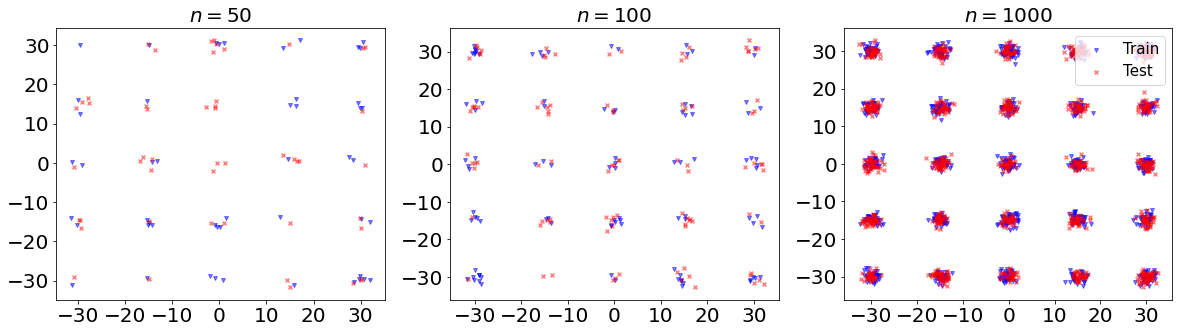

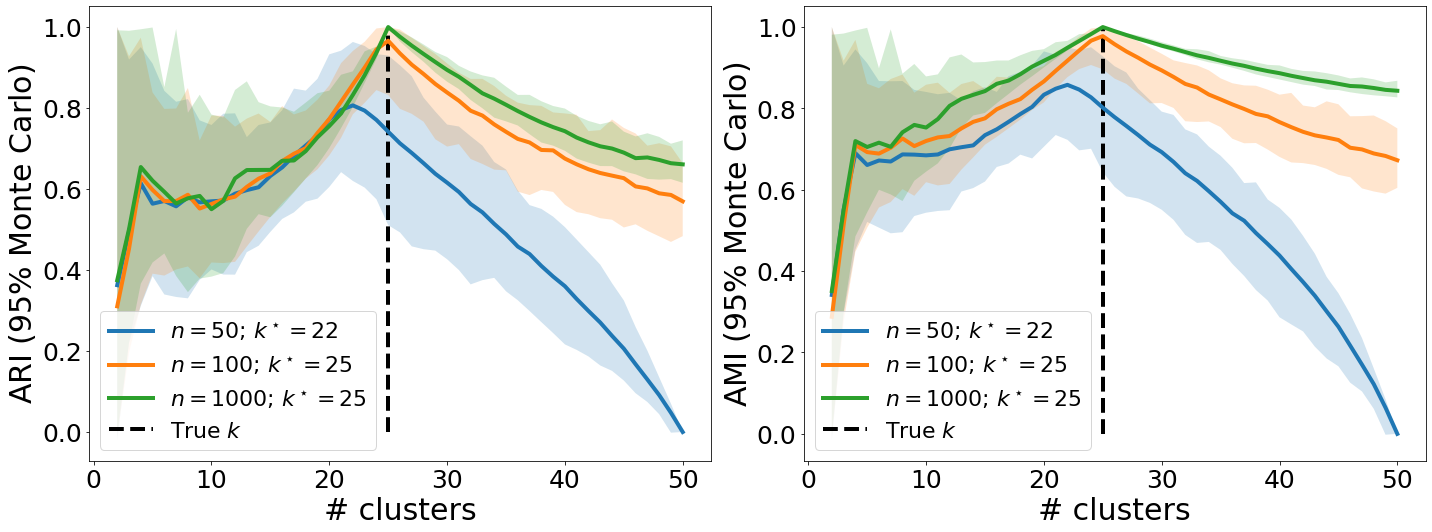

In [4]:
'''
    SETUP PARAMETERS FOR SYNTHETIC DATA GENERATION
'''

x = np.linspace(-30,30, 5) # coordinates for centroids
y = np.linspace(-30,30, 5) # coordinates for centroids
# setup centroids
centroids = []
for xx in x:
    for yy in y:
        centroids.append(np.array([xx, yy]))
centroids = np.array(centroids)
sigma = 1 # variance
N_ls = [50, 100, 1000] # sizes of datasets

'''
    DRAW AND PLOT SYNTHETIC DATA
'''

plt.figure(figsize = (20,5))

for n, N in enumerate(N_ls): # for every sample size
    indices_train = np.random.choice(len(centroids), N) # draw component for each datapoint in train set
    indices_test = np.random.choice(len(centroids), N) # draw component for each datapoint in test set
    train_set = generate_set(indices_train, centroids, sigma) # draw train set
    test_set = generate_set(indices_test, centroids, sigma) # draw test set
    
    ### PLOT
    
    plt.subplot(1,3,n+1)
    plt.scatter(train_set[:,0], train_set[:,1], color = 'b', marker = 'v', alpha = .5, s = 15, label = 'Train')
    plt.scatter(test_set[:,0], test_set[:,1], color = 'r', marker = 'x', alpha =.5,  s = 15, label = 'Test')
    if n == 2:
        plt.legend(fontsize = 15, loc = 'upper right')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title(r'$n=$'+str(N), fontsize = 20)
plt.savefig('Plots/n_dependence_ds.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

max_cluster_number = 50 # upper bound on number of clusters
N_MC = 100 # number of Monte Carlo draws

'''
    COMPUTE REPLICABILITY INDEX
'''

# ari_MC, ami_MC = np.zeros([max_cluster_number-1, len(N_ls), N_MC]), np.zeros([max_cluster_number-1, len(N_ls), N_MC])
# for seed in tqdm_notebook(range(N_MC)):
#     np.random.seed(seed)
#     print('seed : ', seed,'\n')
#     for n, N in enumerate(N_ls):
#         print('\tN : ', N,'\n')
#         index_train, index_test = np.random.choice(len(centroids), N), np.random.choice(len(centroids), N)
#         train_set, test_set = generate_set(index_train, centroids, sigma, seed = seed), generate_set(index_test, centroids, sigma, seed = N_MC+seed)
#         for _, n_clust in enumerate(range(2, max_cluster_number+1)):
#             method_dict = default_dictionary_kmeans(n_clust, INIT, N_INIT, MAX_ITER)
#             r_ari, r_ami, true_labels, predicted_labels = repro_score(train_set, test_set, method_dict)
#             ari_MC[_, n, seed] = r_ari
#             ami_MC[_, n, seed] = r_ami
            
'''
    SAVE RESULTS
'''

# np.save('Additional_Experiments/dependent_ari', ari_MC)
# np.save('Additional_Experiments/dependent_ami', ami_MC)
  
'''
    LOAD RESULTS
'''

ari_MC = np.load('Additional_Experiments/dependent_ari.npy')
ami_MC = np.load('Additional_Experiments/dependent_ami.npy')

'''
    PLOTTING
'''

plt.figure(figsize = (20,7.5))
N_ls = [50, 100, 1000]
plt.subplot(121)
lo = .025
hi = .975
for n, N in enumerate(N_ls):
    best_k = np.argmax(np.mean(ari_MC[:,n], axis = -1))
    plt.plot(np.arange(2,len(ari_MC)+2), np.mean(ari_MC[:,n], axis = -1),  label = r'$n=$'+str(N_ls[n])+r'; $k^\star=$'+str(2+best_k), lw=4)
    plt.fill_between(np.arange(2,len(ari_MC)+2), np.quantile(ari_MC[:,n], lo, axis = -1), np.quantile(ari_MC[:,n], hi, axis = -1), alpha=.2)
plt.vlines(x = 25, ymin = 0, ymax = 1, linestyle = '--', lw = 4, color = 'k', label = r'True $k$')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel('ARI ($95\%$ Monte Carlo)', fontsize = 30)
# plt.ylim([0,1.2])
plt.legend(loc = 'lower left', fontsize = 22)
plt.xlabel('# clusters', fontsize = 30)
plt.subplot(122)
for n, N in enumerate(N_ls):
    best_k = np.argmax(np.mean(ami_MC[:,n], axis = -1))
    plt.plot(np.arange(2,len(ami_MC)+2), np.mean(ami_MC[:,n], axis = -1),  label = r'$n=$'+str(N_ls[n])+r'; $k^\star=$'+str(2+best_k), lw=4)
    plt.fill_between(np.arange(2,len(ami_MC)+2), np.quantile(ami_MC[:,n], lo, axis = -1), np.quantile(ami_MC[:,n], hi, axis = -1), alpha=.2)
plt.vlines(x = 25, ymin = 0, ymax = 1, linestyle = '--', lw = 4, color = 'k', label = r'True $k$')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel(r'AMI ($95\%$ Monte Carlo)', fontsize = 30)
plt.xlabel('# clusters', fontsize = 30)
plt.legend(loc = 'lower left', fontsize = 22)
plt.tight_layout()
plt.savefig('Plots/n_dependence.pdf', dpi = 1000, bbox_inches = 'tight')

How does the bootstrap perform in terms of coverage?

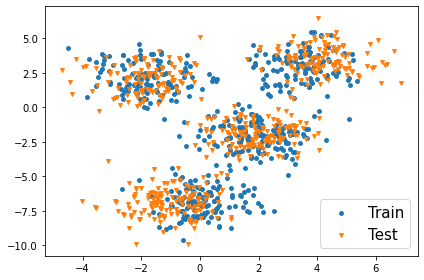

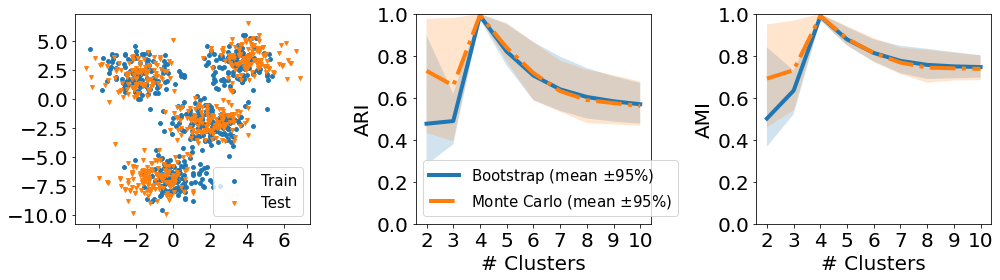

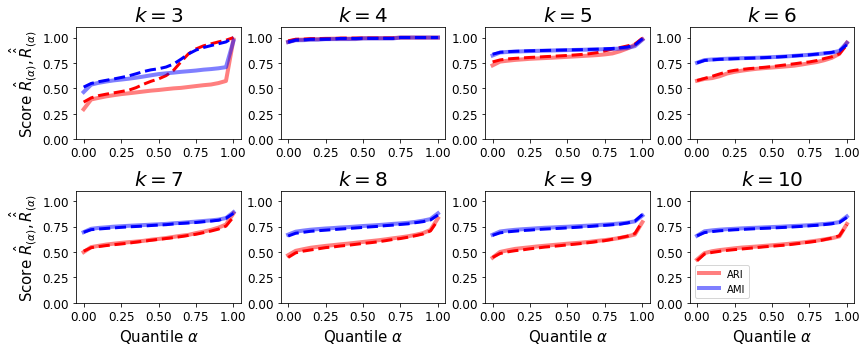

In [5]:
'''
    SETUP PARAMETERS FOR SYNTHETIC DATA GENERATION
'''

d = 2 # dimension
N = 500 # size of sample
seed = 42 # seed for pseudo RNG
N_MC = 1000 # number of Monte Carlo draws
np.random.seed(seed) # set random seed
INIT = 'k-means++' # initialize
N_INIT = 50 # number of initializations
MAX_ITER = 300 # maximum number of iterations

# CENTROIDS FOR SYNTHETIC DATA GENERATION

mu_A = np.array([0, -7])
mu_A_ = np.array([-1, -7])
mu_B = np.array([3.5, 3])
mu_B_ = np.array([4.2, 3.3])
mu_C = np.array([-2, 2])
mu_C_ = np.array([-2.5, 1.8])
mu_D = np.array([2, -2])
mu_D_ = np.array([2.2, -3])
centroids = np.array([mu_A, mu_B, mu_C, mu_D])
centroids_ = np.array([mu_A_, mu_B_, mu_C, mu_D])

sigma = 1 # standard deviation

'''
    DRAW SYNTHETIC DATA
'''

# index_train, index_test = np.random.choice(len(centroids), N), np.random.choice(len(centroids), N)
# X_train, X_test = generate_set(index_train, centroids, sigma, seed = 0), generate_set(index_test, centroids_, sigma, seed = 1)

'''
    SAVE DATA
'''

# np.save('Additional_Experiments/calibration_train', X_train)
# np.save('Additional_Experiments/calibration_test', X_test)

'''
    LOAD DATA
'''

X_train = np.load('Additional_Experiments/calibration_train.npy', allow_pickle=1)
X_test = np.load('Additional_Experiments/calibration_test.npy', allow_pickle=1)


'''
    PLOTTING DATA
'''

plt.scatter(X_train[:,0], X_train[:,1], s = 15, label = 'Train')
plt.scatter(X_test[:,0], X_test[:,1], s= 15, marker = 'v', label = 'Test')
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('Plots/calibration_ds.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

'''
    COMPUTE BOOTSTRAP REPLICABILITY INDEX FOR ONE DATASET
'''

num_boots = 1000
max_cluster_number = 10
# ari, ami, true_labels, predicted_labels = run_exercise_1_kmeans(X_train, X_test, num_boots, max_cluster_number)

'''
    SAVE RESULTS
'''

# np.save('Additional_Experiments/calibration_ari_boot', ari)
# np.save('Additional_Experiments/calibration_ami_boot', ami)

'''
    LOAD RESULTS
'''

ari = np.load('Additional_Experiments/calibration_ari_boot.npy', allow_pickle = 1)
ami = np.load('Additional_Experiments/calibration_ami_boot.npy', allow_pickle = 1)

'''
    NOW COMPUTE BOOTSTRAP REPLICABILITY INDEX FOR MANY MC DRAWN DATASET
'''

# ari_MC, ami_MC = np.zeros([max_cluster_number-1, N_MC]), np.zeros([max_cluster_number-1, N_MC])
# for seed in tqdm_notebook(range(N_MC)):
#     np.random.seed(seed)
#     index_train, index_test = np.random.choice(len(centroids), N), np.random.choice(len(centroids), N)
#     train_set, test_set = generate_set(index_train, centroids, sigma, seed = seed), generate_set(index_test, centroids_, sigma, seed = N_MC+seed)
#     for _, n_clust in enumerate(range(2, max_cluster_number+1)):
#         method_dict = default_dictionary_kmeans(n_clust, INIT, N_INIT, MAX_ITER)
#         r_ari, r_ami, true_labels, predicted_labels = repro_score(train_set, test_set, method_dict)
#         ari_MC[_, seed] = r_ari
#         ami_MC[_, seed] = r_ami

'''
    SAVE RESULTS
'''
        
# np.save('Additional_Experiments/calibration_ari_MC', ari_MC)
# np.save('Additional_Experiments/calibration_ami_MC', ami_MC)

'''
    LOAD RESULTS 
'''

ari_MC = np.load('Additional_Experiments/calibration_ari_MC.npy', allow_pickle=1)
ami_MC = np.load('Additional_Experiments/calibration_ami_MC.npy', allow_pickle=1)

ami_mean = ami.mean(axis = 1) # compute ami mean
ari_mean = ari.mean(axis = 1) # compute ari mean
ami_mean_MC = ami_MC.mean(axis = 1) # compute ami_MC mean
ari_mean_MC = ari_MC.mean(axis = 1) # compute ari_MC mean

'''
    PLOTTING
'''

plt.figure(figsize = (14,4))

plt.subplot(131)
plt.scatter(X_train[:,0], X_train[:,1], s = 15, label = 'Train')
plt.scatter(X_test[:,0], X_test[:,1], s= 15, marker = 'v', label = 'Test')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
# plt.tight_layout()

plt.subplot(132)

plt.plot(np.arange(2, len(ari_mean)+2), ari_mean, label = r'Bootstrap (mean $\pm 95\%$)', lw=4)
plt.fill_between(np.arange(2, len(ari_mean)+2), np.quantile(ari, .025, axis=1), np.quantile(ari, .975, axis=1), alpha = .2)

plt.plot(np.arange(2, len(ari_mean_MC)+2), ari_mean_MC, label = r'Monte Carlo (mean $\pm 95\%$)', lw = 4, linestyle = '-.')
plt.fill_between(np.arange(2, len(ari_mean_MC)+2), np.quantile(ari_MC, .025, axis=1), np.quantile(ari_MC, .975, axis=1), alpha = .2)

plt.legend(fontsize = 15)
plt.ylabel('ARI', fontsize = 20)
plt.xlabel('# Clusters', fontsize = 20)
plt.xticks(np.arange(2,len(ari_mean_MC)+2, dtype = int), fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim([0,1])

plt.subplot(133)

plt.plot(np.arange(2, len(ami_mean)+2), ami_mean, lw = 4)
plt.fill_between(np.arange(2, len(ami_mean)+2), np.quantile(ami, .025, axis=1), np.quantile(ami, .975, axis=1), alpha = .2)

plt.plot(np.arange(2, len(ami_mean_MC)+2), ami_mean_MC, lw = 4, linestyle = '-.')
plt.fill_between(np.arange(2, len(ami_mean_MC)+2), np.quantile(ami_MC, .025, axis=1), np.quantile(ami_MC, .975, axis=1), alpha = .2)

plt.ylabel('AMI', fontsize = 20)
plt.xlabel('# Clusters', fontsize = 20)
plt.xticks(np.arange(2,len(ami_mean_MC)+2, dtype = int), fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim([0,1])
plt.tight_layout()
plt.savefig('Plots/calibration.pdf', bbox_inches = 'tight', dpi = 1000)
plt.show()


pis = np.linspace(0,1,21)
ari_calib, ami_calib = np.quantile(ari, q = pis, axis = 1), np.quantile(ami, q = pis, axis = 1)
ari_calib_MC, ami_calib_MC = np.quantile(ari_MC, q = pis, axis = 1), np.quantile(ami_MC, q = pis, axis = 1)

plt.figure(figsize = (12,5))
for k in range(1,ari_calib.shape[1]):
    plt.subplot(2,4,k)
    plt.plot(pis, ari_calib[:,k], lw = 4, label = 'ARI', alpha = .5, color = 'red')
    plt.plot(pis, ari_calib_MC[:,k], lw = 3, linestyle = '--', color = 'r')
    
    plt.plot(pis, ami_calib[:,k], lw = 4, alpha = .5, label = 'AMI', color = 'b')
    plt.plot(pis, ami_calib_MC[:,k], lw = 3, linestyle = '--', color = 'b')
    
    plt.title(r'$k=$'+str(k+2), fontsize = 20)
    if k >4:
        plt.xlabel(r'Quantile $\alpha$', fontsize = 15)
    if k in [1,5]:
        plt.ylabel(r'Score $\hat{R}_{(\alpha)}, \hat{\hat{R}}_{(\alpha)}$', fontsize =15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.ylim([0,1.1])
    if k == 8:
        plt.legend()
plt.tight_layout()
plt.savefig('Plots/calibration_quantiles.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

Replicate calibration exercise for a different dataset

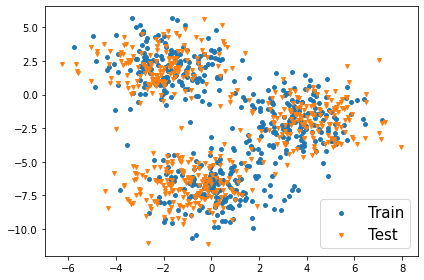

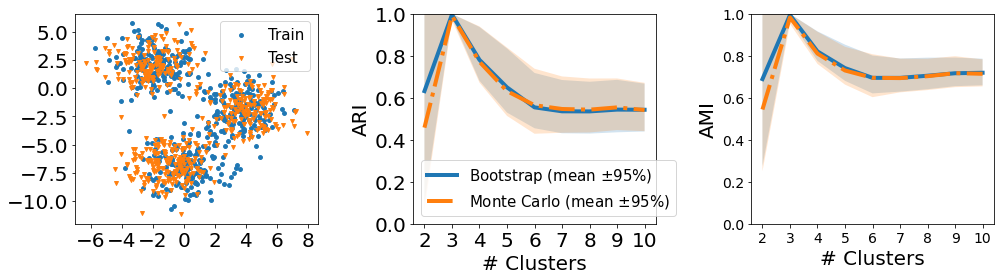

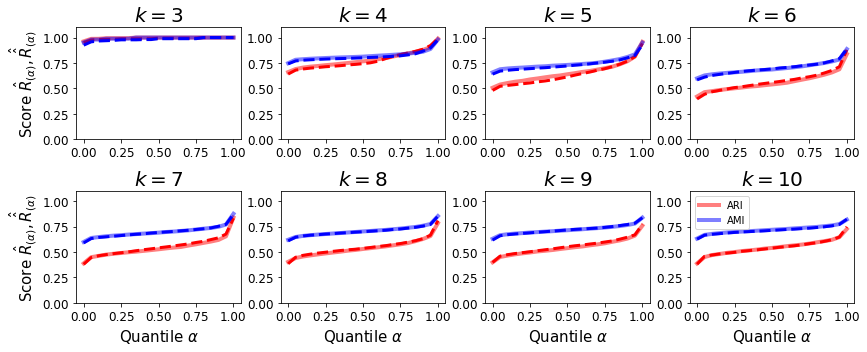

In [6]:
'''
    SETUP PARAMETERS FOR SYNTHETIC DATA GENERATION
'''

d = 2
N = 500
seed = 42
N_MC = 1000
num_boots = 1000
max_cluster_number = 10

np.random.seed(seed)


INIT = 'k-means++'
N_INIT = 50
MAX_ITER = 300

mu_A = np.array([0, -7])
mu_A_ = np.array([-1, -7])
mu_B = np.array([3.5, -2])
mu_B_ = np.array([4.2, -1.8])
mu_C = np.array([-2, 2])
mu_C_ = np.array([-2.5, 1.8])


centroids = np.array([mu_A, mu_B, mu_C]) 
centroids_ = np.array([mu_A_, mu_B_, mu_C])

sigma = 2

'''
     DRAW SYNTHETIC DATA
'''

# index_train, index_test = np.random.choice(len(centroids), N), np.random.choice(len(centroids), N)
# X_train, X_test = generate_set(index_train, centroids, sigma, seed = 0), generate_set(index_test, centroids_, sigma, seed = 1)

'''
    SAVE DATA
'''

# np.save('Additional_Experiments/calibration_train_2', X_train)
# np.save('Additional_Experiments/calibration_test_2', X_test)

'''
    LOAD DATA
'''
X_train = np.load('Additional_Experiments/calibration_train_2.npy', allow_pickle=1) 
X_test = np.load('Additional_Experiments/calibration_test_2.npy', allow_pickle=1)

'''
    PLOT DATA
'''

plt.scatter(X_train[:,0], X_train[:,1], s = 15, label = 'Train')
plt.scatter(X_test[:,0], X_test[:,1], s= 15, marker = 'v', label = 'Test')
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('Plots/calibration_ds_2.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()


'''
    COMPUTE BOOTSTRAP REPLICABILITY INDEX FOR ONE DATASET
'''

# ari, ami, true_labels, predicted_labels = run_exercise_1_kmeans(X_train, X_test, num_boots, max_cluster_number)

'''
    SAVE RESULTS
'''

# np.save('Additional_Experiments/calibration_ari_boot_2', ari)
# np.save('Additional_Experiments/calibration_ami_boot_2', ami)

'''
    LOAD RESULTS
'''
ari = np.load('Additional_Experiments/calibration_ari_boot_2.npy')
ami = np.load('Additional_Experiments/calibration_ami_boot_2.npy')

'''
    NOW COMPUTE BOOTSTRAP REPLICABILITY INDEX FOR MANY MC DRAWN DATASET
'''

# ari_MC, ami_MC = np.zeros([max_cluster_number-1, N_MC]), np.zeros([max_cluster_number-1, N_MC])
# for seed in tqdm_notebook(range(N_MC)):
#     np.random.seed(seed)
#     index_train, index_test = np.random.choice(len(centroids), N), np.random.choice(len(centroids), N)
#     train_set, test_set = generate_set(index_train, centroids, sigma, seed = seed), generate_set(index_test, centroids_, sigma, seed = N_MC+seed)
#     for _, n_clust in enumerate(range(2, max_cluster_number+1)):
#         method_dict = default_dictionary_kmeans(n_clust, INIT, N_INIT, MAX_ITER)
#         r_ari, r_ami, true_labels, predicted_labels = repro_score(train_set, test_set, method_dict)
#         ari_MC[_, seed] = r_ari
#         ami_MC[_, seed] = r_ami

'''
    SAVE RESULTS
'''        

# np.save('Additional_Experiments/calibration_ari_MC_2', ari_MC)
# np.save('Additional_Experiments/calibration_ami_MC_2', ami_MC)

'''
    LOAD RESULTS
'''

ari_MC = np.load('Additional_Experiments/calibration_ari_MC_2.npy')
ami_MC = np.load('Additional_Experiments/calibration_ami_MC_2.npy')

ami_mean = ami.mean(axis = 1)
ari_mean = ari.mean(axis = 1)
ari_mean_MC = ari_MC.mean(axis = 1)
ami_mean_MC = ami_MC.mean(axis = 1)

'''
    PLOTTING
'''


plt.figure(figsize = (14,4))

plt.subplot(131)
plt.scatter(X_train[:,0], X_train[:,1], s = 15, label = 'Train')
plt.scatter(X_test[:,0], X_test[:,1], s= 15, marker = 'v', label = 'Test')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(fontsize = 15)
# plt.tight_layout()

plt.subplot(132)

plt.plot(np.arange(2, len(ari_mean)+2), ari_mean, label = r'Bootstrap (mean $\pm 95\%$)', lw=4)
plt.fill_between(np.arange(2, len(ari_mean)+2), np.quantile(ari, .025, axis=1), np.quantile(ari, .975, axis=1), alpha = .2)

plt.plot(np.arange(2, len(ari_mean_MC)+2), ari_mean_MC, label = r'Monte Carlo (mean $\pm 95\%$)', lw = 4, linestyle = '-.')
plt.fill_between(np.arange(2, len(ari_mean_MC)+2), np.quantile(ari_MC, .025, axis=1), np.quantile(ari_MC, .975, axis=1), alpha = .2)

plt.legend(fontsize = 15)
plt.ylabel('ARI', fontsize = 20)
plt.xlabel('# Clusters', fontsize = 20)
plt.xticks(np.arange(2,len(ari_mean_MC)+2, dtype = int), fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim([0,1])

plt.subplot(133)

plt.plot(np.arange(2, len(ami_mean)+2), ami_mean, lw = 4)
plt.fill_between(np.arange(2, len(ami_mean)+2), np.quantile(ami, .025, axis=1), np.quantile(ami, .975, axis=1), alpha = .2)

plt.plot(np.arange(2, len(ami_mean_MC)+2), ami_mean_MC, lw = 4, linestyle = '-.')
plt.fill_between(np.arange(2, len(ami_mean_MC)+2), np.quantile(ami_MC, .025, axis=1), np.quantile(ami_MC, .975, axis=1), alpha = .2)

plt.ylabel('AMI', fontsize = 20)
plt.xlabel('# Clusters', fontsize = 20)
plt.xticks(np.arange(2,len(ami_mean_MC)+2, dtype = int), fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim([0,1])
plt.tight_layout()
plt.savefig('Plots/calibration_2.pdf', bbox_inches = 'tight', dpi = 1000)
plt.show()

pis = np.linspace(0,1,21)
ari_calib, ami_calib = np.quantile(ari, q = pis, axis = 1), np.quantile(ami, q = pis, axis = 1)
ari_calib_MC, ami_calib_MC = np.quantile(ari_MC, q = pis, axis = 1), np.quantile(ami_MC, q = pis, axis = 1)

plt.figure(figsize = (12,5))
for k in range(1,ari_calib.shape[1]):
    plt.subplot(2,4,k)
    plt.plot(pis, ari_calib[:,k], lw = 4, label = 'ARI', alpha = .5, color = 'red')
    plt.plot(pis, ari_calib_MC[:,k], lw = 3, linestyle = '--', color = 'r')
    
    plt.plot(pis, ami_calib[:,k], lw = 4, alpha = .5, label = 'AMI', color = 'b')
    plt.plot(pis, ami_calib_MC[:,k], lw = 3, linestyle = '--', color = 'b')
    
    plt.title(r'$k=$'+str(k+2), fontsize = 20)
    
    if k >4:
        plt.xlabel(r'Quantile $\alpha$', fontsize = 15)
    if k in [1,5]:
        plt.ylabel(r'Score $\hat{R}_{(\alpha)}, \hat{\hat{R}}_{(\alpha)}$', fontsize =15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.ylim([0,1.1])
    if k == 8:
        plt.legend()
plt.tight_layout()
plt.savefig('Plots/calibration_quantiles_2.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()